In [3]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


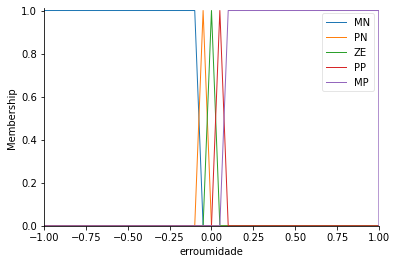

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
erroumidade = ctrl.Antecedent(np.arange(-1, 1.001, 0.001), 'erroumidade')
valvula =ctrl.Consequent(np.arange(0, 101, 1), 'valvula')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
erroumidade['MN'] = fuzz.trapmf(erroumidade.universe, [-1, -1, -0.1,-0.05])
erroumidade['PN'] = fuzz.trimf(erroumidade.universe, [-0.1,-0.05,0])
erroumidade['ZE'] = fuzz.trimf(erroumidade.universe, [-0.05, 0, 0.05])
erroumidade['PP'] = fuzz.trimf(erroumidade.universe, [0, 0.05, 0.1])
erroumidade['MP'] = fuzz.trapmf(erroumidade.universe,[0.05, 0.1, 1,1])
# You can see how these look with .view()
erroumidade.view()

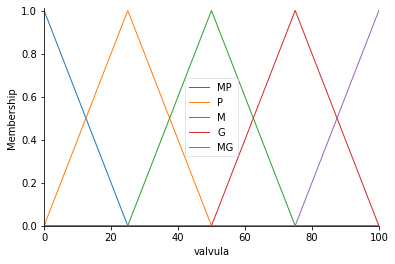

In [5]:
valvula['MP'] = fuzz.trimf(valvula.universe, [0,0,25])
valvula['P'] = fuzz.trimf(valvula.universe, [0,25,50])
valvula['M'] = fuzz.trimf(valvula.universe, [25, 50, 75])
valvula['G'] = fuzz.trimf(valvula.universe, [50, 75, 100])
valvula['MG'] = fuzz.trimf(valvula.universe, [75, 100, 100])
valvula.view()

In [6]:
regra1 = ctrl.Rule(erroumidade['MN'], valvula['MG'])
regra2 = ctrl.Rule(erroumidade['PN'], valvula['G'])
regra3 = ctrl.Rule(erroumidade['ZE'], valvula['M'])
regra4 = ctrl.Rule(erroumidade['PP'], valvula['P'])
regra5 = ctrl.Rule(erroumidade['MP'], valvula['MP'])

In [7]:
valvula_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5])
abertura = ctrl.ControlSystemSimulation(valvula_ctrl)

8.333333333333332


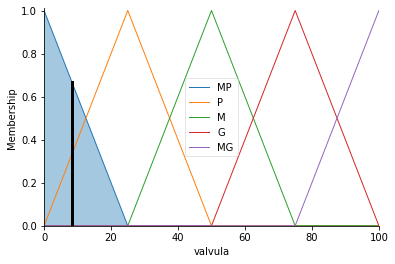

In [8]:
abertura.input['erroumidade'] =0.35
abertura.compute()
print (abertura.output['valvula'])
valvula.view(sim=abertura)
